In [1]:
#importing required libraries
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


# Step 1: Loading and Preprocessing the CIFAR-10 Dataset¶

In [4]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [5]:
# Normalize the pixel values to be between 0 and 1
# Original pixel values are in the range [0, 255]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
# Verify the shape of the data
print("Training data shape:", train_images.shape, train_labels.shape)
print("Testing data shape:", test_images.shape, test_labels.shape)

Training data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 1)


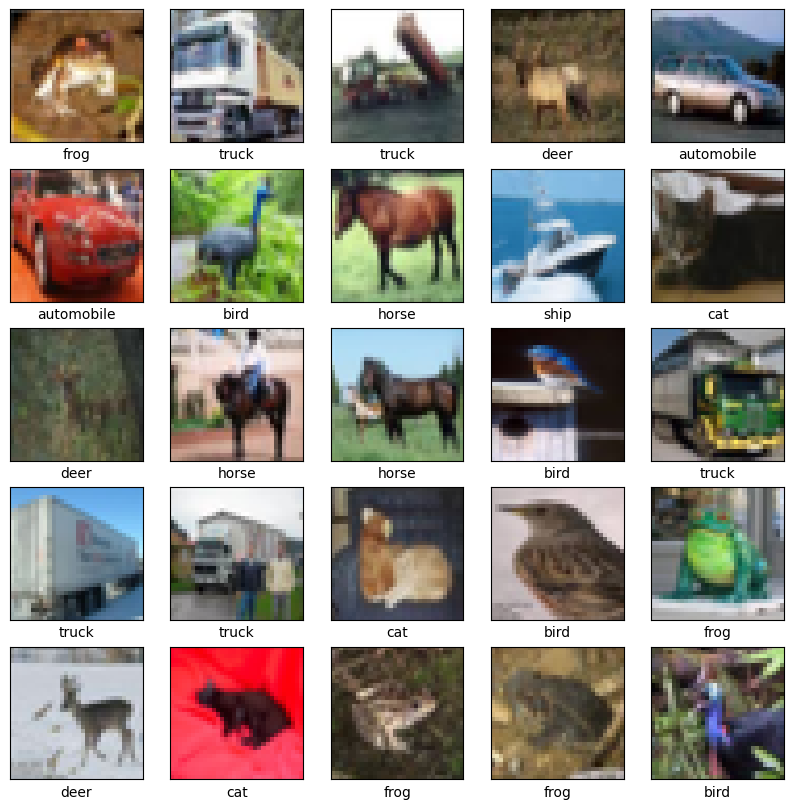

In [7]:
# Display the first 25 images and their labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Step 2: Building a CNN Model

In [8]:
from tensorflow.keras import layers, models

In [9]:
# Define the CNN model
model = models.Sequential()

# Add the first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected (dense) layer
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (one for each class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3: Training the CNN Model¶

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3081 - loss: 1.8572 - val_accuracy: 0.4714 - val_loss: 1.4533
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5228 - loss: 1.3385 - val_accuracy: 0.5659 - val_loss: 1.2292
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5920 - loss: 1.1432 - val_accuracy: 0.6061 - val_loss: 1.1183
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6324 - loss: 1.0461 - val_accuracy: 0.6391 - val_loss: 1.0312
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6669 - loss: 0.9448 - val_accuracy: 0.6580 - val_loss: 0.9903
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6866 - loss: 0.8907 - val_accuracy: 0.6688 - val_loss: 0.9558
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7055 - loss: 0.8342 - val_accuracy: 0.6742 - val_loss: 0.9359
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7283 - loss: 0.7740 - val_ac

In [12]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6880 - loss: 0.9110
Test Accuracy: 68.44%
Test Loss: 0.9180


In [15]:
# Save the entire model to a HDF5 file
model.save('cifar10_cnn_model.h5')
print("Model saved successfully.")

Model saved successfully.


# Step 4: Improving the Model by data augmentation adding more layers

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
loaded_model = load_model('cifar10_cnn_model.h5')

# Recreate the optimizer
loaded_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Prepare data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)

# Continue training the model with augmented data
history = loaded_model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                           epochs=10,
                           validation_data=(test_images, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.6668 - loss: 0.9633 - val_accuracy: 0.7062 - val_loss: 0.8739
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6760 - loss: 0.9217 - val_accuracy: 0.7099 - val_loss: 0.8656
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6803 - loss: 0.9128 - val_accuracy: 0.7237 - val_loss: 0.8276
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6909 - loss: 0.8866 - val_accuracy: 0.7184 - val_loss: 0.8412
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6929 - loss: 0.8850 - val_accuracy: 0.7187 - val_loss: 0.8387
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6924 - loss: 0.8763 - val_accuracy: 0.7144 - val_loss: 0.8452
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6988 - loss: 0.8643 - val_accuracy: 0.7227 - val_loss: 0.8188
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.6973 - loss: 0.8647 - 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define a more complex model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1)))  # Adjusted pooling size
model.add(Dropout(0.25))

# Flatten layer and dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 1, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 491,818 (1.88 MB)

 Trainable params: 489,386 (1.87 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [18]:
# Train the model with augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50,  # Increase the number of epochs
                    validation_data=(test_images, test_labels))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 82ms/step - accuracy: 0.2439 - loss: 2.4220 - val_accuracy: 0.4923 - val_loss: 1.4190
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.4671 - loss: 1.4814 - val_accuracy: 0.5873 - val_loss: 1.1452
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.5588 - loss: 1.2454 - val_accuracy: 0.6547 - val_loss: 0.9890
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.6050 - loss: 1.1239 - val_accuracy: 0.5885 - val_loss: 1.2123
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.6444 - loss: 1.0370 - val_accuracy: 0.6876 - val_loss: 0.9121
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6683 - loss: 0.9681 - val_accuracy: 0.7085 - val_loss: 0.8419
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6822 - loss: 0.9292 - val_accuracy: 0.7139 - val_loss: 0.8241
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.6946 - loss: 0.8862 -

782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8184 - loss: 0.5389 - val_accuracy: 0.8459 - val_loss: 0.4549


In [20]:
# Save the entire model to a HDF5 file
model.save('cifar10_cnn_model.h5')
print("Model saved successfully.")

Model saved successfully.


# Step 5: Evaluating the model

In [19]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8444 - loss: 0.4566
Test Accuracy: 84.59%
Test Loss: 0.4549


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


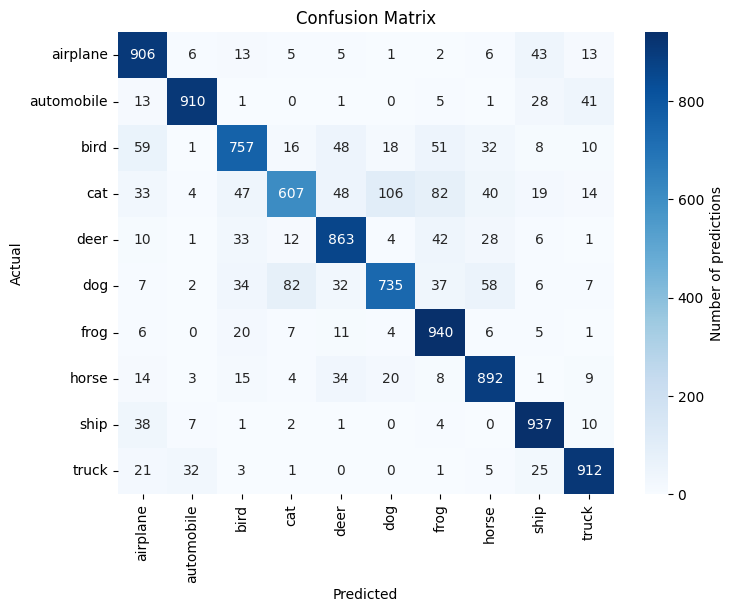

Classification Report:
              precision    recall  f1-score   support

    airplane       0.82      0.91      0.86      1000
  automobile       0.94      0.91      0.93      1000
        bird       0.82      0.76      0.79      1000
         cat       0.82      0.61      0.70      1000
        deer       0.83      0.86      0.84      1000
         dog       0.83      0.73      0.78      1000
        frog       0.80      0.94      0.87      1000
       horse       0.84      0.89      0.86      1000
        ship       0.87      0.94      0.90      1000
       truck       0.90      0.91      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [21]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
loaded_model = load_model('cifar10_cnn_model.h5')

# Make predictions using the loaded model
loaded_predictions = loaded_model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(loaded_predictions, axis=1)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, 
            cbar_kws={'label': 'Number of predictions'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

# Step 6: Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


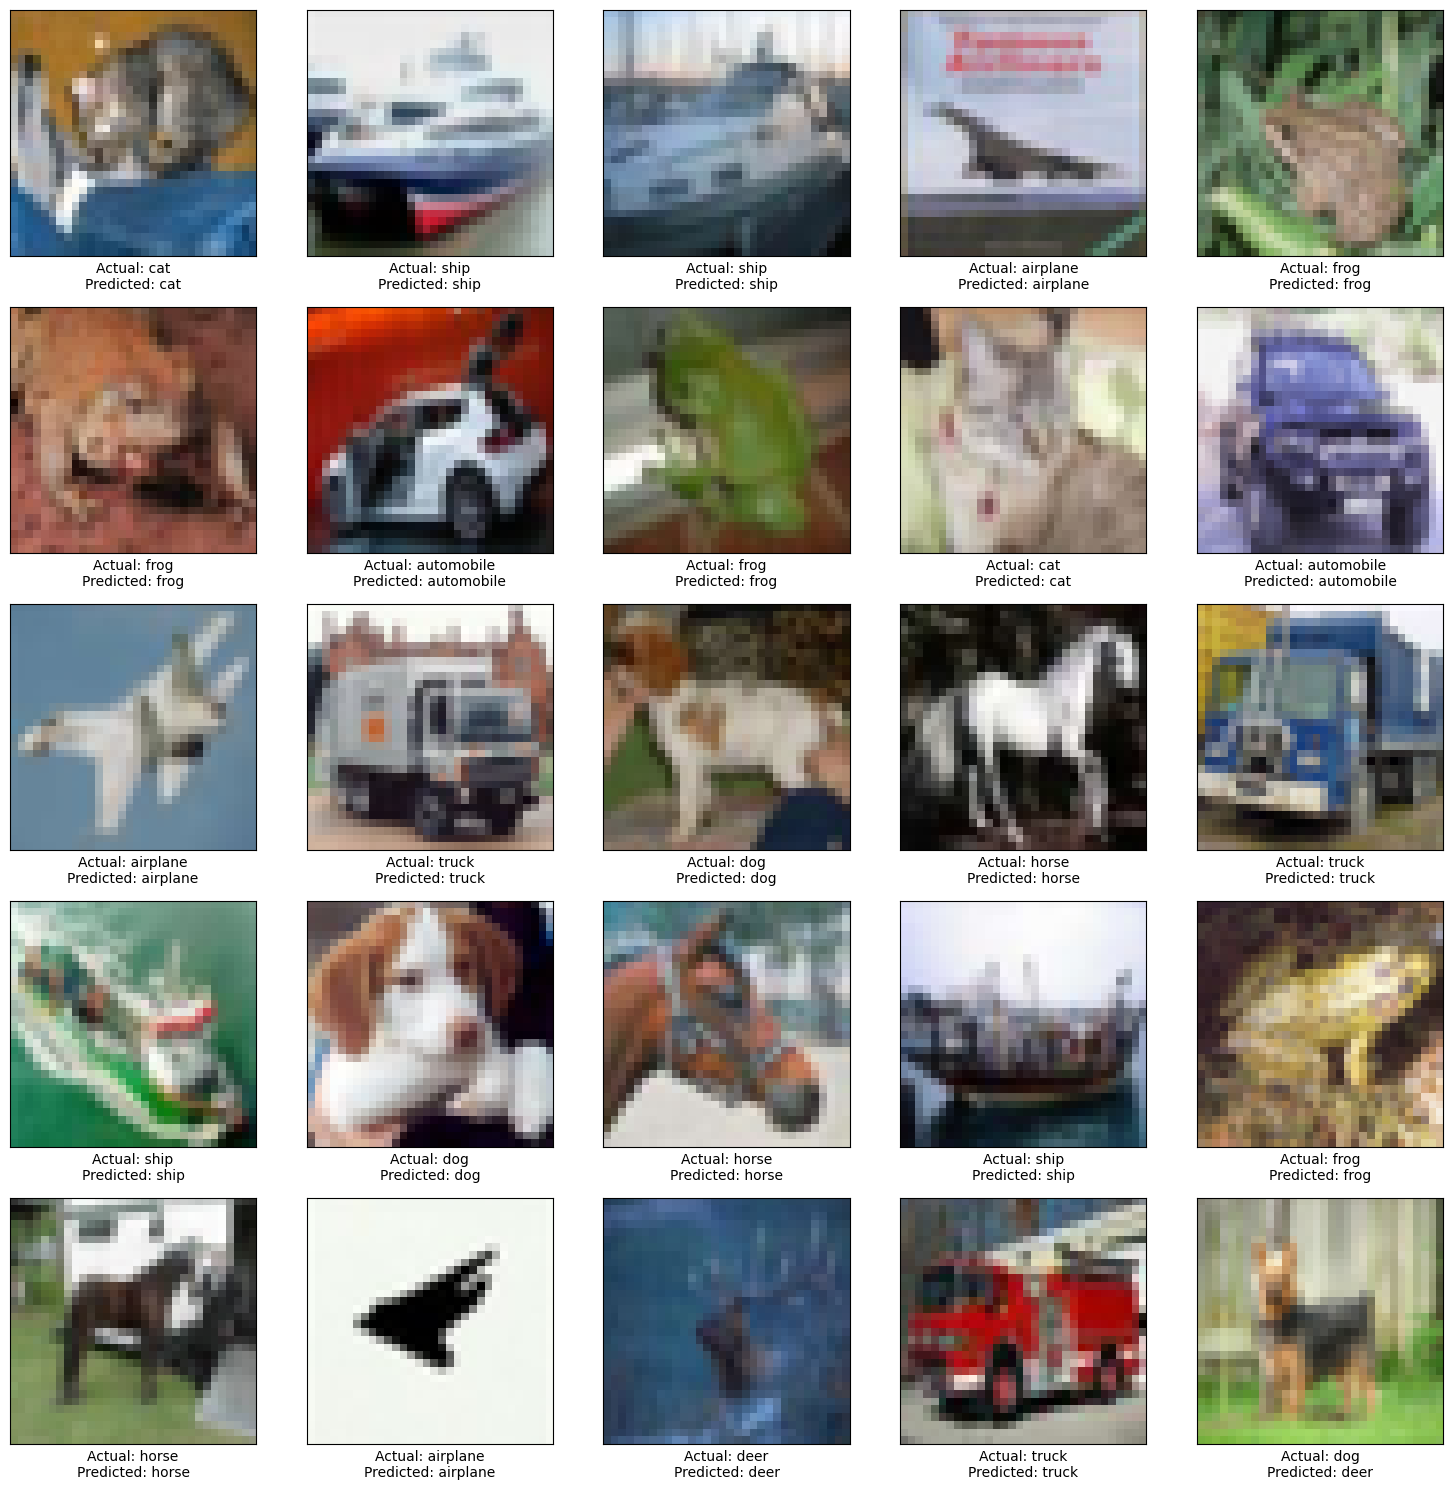

In [42]:
import numpy as np

# Make predictions on test data
predictions = loaded_model.predict(test_images)

# Get predicted class labels (the class with highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Display predictions
plt.figure(figsize=(15, 15))

n_cols = 5
n_rows = 5

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {class_names[test_labels[i][0]]}\nPredicted: {class_names[predicted_labels[i]]}')

plt.tight_layout()
plt.show()

# Step 7 : Testing

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model (assuming 'loaded_model' is already loaded as in the previous step)
loaded_model = tf.keras.models.load_model('cifar10_cnn_model.h5')

# Define class names (assuming same as previous example)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to load, display, and predict on a single image
def predict_image(image_path):
    # Load and display the image
    img = plt.imread(image_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Load the image and preprocess it for prediction
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

    # Make prediction
    prediction = loaded_model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Display the prediction
    print(f"Predicted Class: {class_names[predicted_class]}")

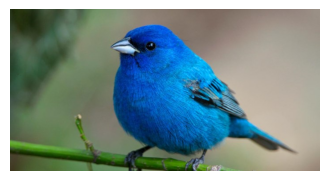

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted Class: bird


In [24]:
image_path = r'C:\Users\sneha\Documents\ML Projects\Animal Classification\Testing Images\bird.jpg'
predict_image(image_path)

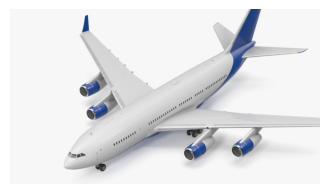

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: airplane


In [25]:
image_path = r'C:\Users\sneha\Documents\ML Projects\Animal Classification\Testing Images\aeroplane.jpg'
predict_image(image_path)

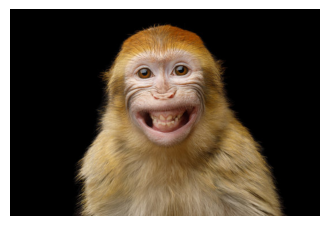

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: horse


In [26]:
image_path = r'C:\Users\sneha\Documents\ML Projects\Animal Classification\Testing Images\monkey.jpg'
predict_image(image_path)

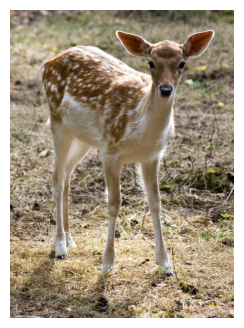

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: frog


In [27]:
image_path = r'C:\Users\sneha\Documents\ML Projects\Animal Classification\Testing Images\deer.jpg'
predict_image(image_path)

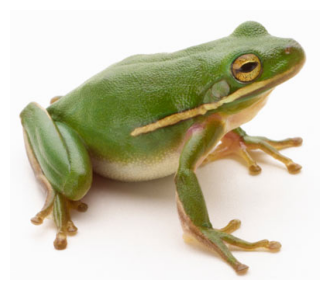

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: frog


In [40]:
image_path = r'C:\Users\sneha\Documents\ML Projects\Animal Classification\Testing Images\frogs.jpg'
predict_image(image_path)